# Task 3 - Music Recommdation System

***Dataset Link : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data***

### Import all the Libraries 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import string
import math
import missingno as msno

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import lightgbm as lgbm

import xgboost as xgb

from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

### Import all the dataset

In [2]:
train = pd.read_csv('kkbox-music-recommendation-challenge/train.csv')
test = pd.read_csv('kkbox-music-recommendation-challenge/test.csv')
songs = pd.read_csv('kkbox-music-recommendation-challenge/songs.csv')
members = pd.read_csv('kkbox-music-recommendation-challenge/members.csv')
song_extra_info = pd.read_csv('kkbox-music-recommendation-challenge/song_extra_info.csv')

In [3]:
print(train.shape, test.shape, songs.shape, members.shape, song_extra_info.shape)

(7377418, 6) (2556790, 6) (2296320, 7) (34403, 7) (2295971, 3)


In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
# Sampling Only Half the Data

train = train.sample(frac=0.5)

In [10]:
train = pd.merge(train, songs, on = 'song_id', how = 'left')
del songs

# Load and join members data
train = pd.merge(train, members, on = 'msno', how = 'left')
del members

In [11]:
train.shape

(3688709, 18)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [13]:
train.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688649e+06,3.688629e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.034097e-01,2.451180e+05,1.861638e+01,7.512388e+00,1.754441e+01,6.794205e+00,2.012811e+07,2.017156e+07
std,4.999884e-01,6.767932e+04,2.117768e+01,6.643510e+00,2.161667e+01,2.275716e+00,3.016560e+04,3.860486e+03
min,0.000000e+00,1.950000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,2.004102e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721950e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [14]:
dtypes = pd.DataFrame(train.dtypes, columns = ["Data Type"])

dtypes["Unique Values"] = train.nunique().sort_values(ascending = True)

dtypes["Null Values"] = train.isnull().sum()

dtypes["% null Values"] = train.isnull().sum() / len(train)

dtypes.sort_values(by = "Null Values", ascending = False).style.background_gradient(cmap = 'viridis',axis = 0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27560,1589374,0.430875
gender,object,2,1480707,0.401416
composer,object,59507,837965,0.227170
source_screen_name,object,20,206954,0.056105
genre_ids,object,508,59260,0.016065
source_system_tab,object,8,12397,0.003361
source_type,object,12,10801,0.002928
language,float64,10,80,0.000022
song_length,float64,49824,60,0.000016
artist_name,object,32302,60,0.000016


### Visualizing Null Values

In [15]:
# plt.figure(figsize = (15,10))

# sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis')
# plt.tick_params(axis = 'x', labelsize = 25)

### Filling NULLValues

In [16]:
# Strings with 'Unknown'
for col in train.select_dtypes(include = ['object']).columns:
    train[col] = train[col].fillna(value = "unknown")
    
# Numerics with mean    
for col in train.select_dtypes(exclude = ['object']).columns:
    train[col] = train[col].fillna(value = train[col].mean())

In [17]:
train.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

### Parsing Dates and Extracting new Date Features

In [18]:
train['registration_init_time'] = pd.to_datetime(train['registration_init_time'], format = '%Y%m%d', errors = 'ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day


train['expiration_date'] = pd.to_datetime(train['expiration_date'],  format = '%Y%m%d', errors = 'ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [19]:
# Dates to categoty

train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category') 

In [20]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,S3qehmPHVqO6L72MPu38yMu4Uz3K1gwILZCRXhpp2zE=,KRo2cs+VL+r1A6L7YzHitGsFLetDAM1Cn0KSTs3s7CA=,my library,Local playlist more,local-library,1,285976.0,465,EXO,Lay / Kim| Jong Dae/ Park| Chan Yeol / Deez,Lay / Kim| Jong Dae/ Park| Chan Yeol / Deez,31.0,13,0,unknown,3,2013-07-31,2018-01-12,2013,7,31,2018,1,12
1,KU08rap3W1qN0zgV2mmr9WEK7Rng3dvrENyZ1BLhctE=,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,my library,Local playlist more,local-playlist,1,185295.0,451,陳奕迅 (Eason Chan),Tang Han Xiao,Tang Han Xiao,3.0,22,22,male,3,2015-05-04,2017-02-16,2015,5,4,2017,2,16
2,gQvKOdJbOarixhDOwJA4TVGb7qYJg6aRrWyRUxwS5A0=,Js3HdCTeXbaGobsUqstjFalxkFcfR5CRBk4jJfegeu4=,my library,Search,online-playlist,1,215693.0,2022,Slipknot,Corey Taylor| Joey Jordison| Paul Gray| Shawn ...,Corey Taylor| Joey Jordison| Paul Gray| Shawn ...,52.0,1,0,unknown,4,2015-12-03,2017-08-02,2015,12,3,2017,8,2
3,DG+a1TCkx7OhusYce71uVWba8eOovnVrKJn5Foi/mm4=,N5SSc7VaeEKs8TVoFd6pgINYDf1yxrxfhOQcU+D/PT4=,my library,Local playlist more,local-library,1,316209.0,465,Madonna,unknown,unknown,52.0,5,0,unknown,9,2015-05-28,2017-10-06,2015,5,28,2017,10,6
4,pzs6AnaFO4XJHdPBPCMNFJvy1flQQZc4nhqSnuqz8Ck=,syUzImP4UmV/2UyqDmwh4+opJ16f5Kz2CWPf3kK+Z40=,my library,Local playlist more,local-library,1,208561.0,465,回音哥,汪蘇瀧,汪蘇瀧,3.0,13,22,female,9,2013-12-20,2018-06-01,2013,12,20,2018,6,1


### Encoding and Categorizating Columns

In [21]:
# Object data to category
for col in train.select_dtypes(include = ['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include = ['category']).columns:
    train[col] = train[col].cat.codes

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [23]:
train.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,1.506261e+04,1.293430e+05,2.440120e+00,9.080135e+00,4.764239e+00,5.034097e-01,2.451180e+05,2.900399e+02,2.179073e+04,4.179934e+04,1.817355e+04,1.861638e+01,7.512388e+00,1.754441e+01,1.114353e+00,6.794205e+00,2.545816e+03,9.461742e+02,2.012741e+03,6.834343e+00,1.581950e+01,2.017071e+03,8.342554e+00,1.562470e+01
std,8.687514e+03,7.487976e+04,1.890188e+00,4.592075e+00,2.468568e+00,4.999884e-01,6.767877e+04,8.742719e+01,9.985973e+03,1.646061e+04,5.686567e+03,2.117745e+01,6.643510e+00,2.161667e+01,8.218288e-01,2.275716e+00,9.641856e+02,1.120421e+02,3.018138e+00,3.700669e+00,8.767827e+00,3.973618e-01,2.511064e+00,9.107026e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,-4.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00
25%,7.533000e+03,6.422700e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,2.970000e+02,1.398100e+04,2.993900e+04,1.822900e+04,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.947000e+03,9.350000e+02,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00,8.000000e+00
50%,1.514900e+04,1.288590e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.418120e+05,3.030000e+02,2.709900e+04,5.020700e+04,1.822900e+04,3.000000e+00,5.000000e+00,2.100000e+01,1.000000e+00,7.000000e+00,2.676000e+03,9.500000e+02,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.500000e+01
75%,2.262800e+04,1.932260e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721950e+05,3.030000e+02,2.944900e+04,5.306300e+04,2.139700e+04,5.200000e+01,1.300000e+01,2.900000e+01,2.000000e+00,9.000000e+00,3.405000e+03,9.600000e+02,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01,2.300000e+01
max,3.004000e+04,2.595950e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.085171e+07,5.080000e+02,3.230200e+04,5.950600e+04,2.755900e+04,5.900000e+01,2.200000e+01,1.051000e+03,2.000000e+00,1.300000e+01,3.807000e+03,1.364000e+03,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


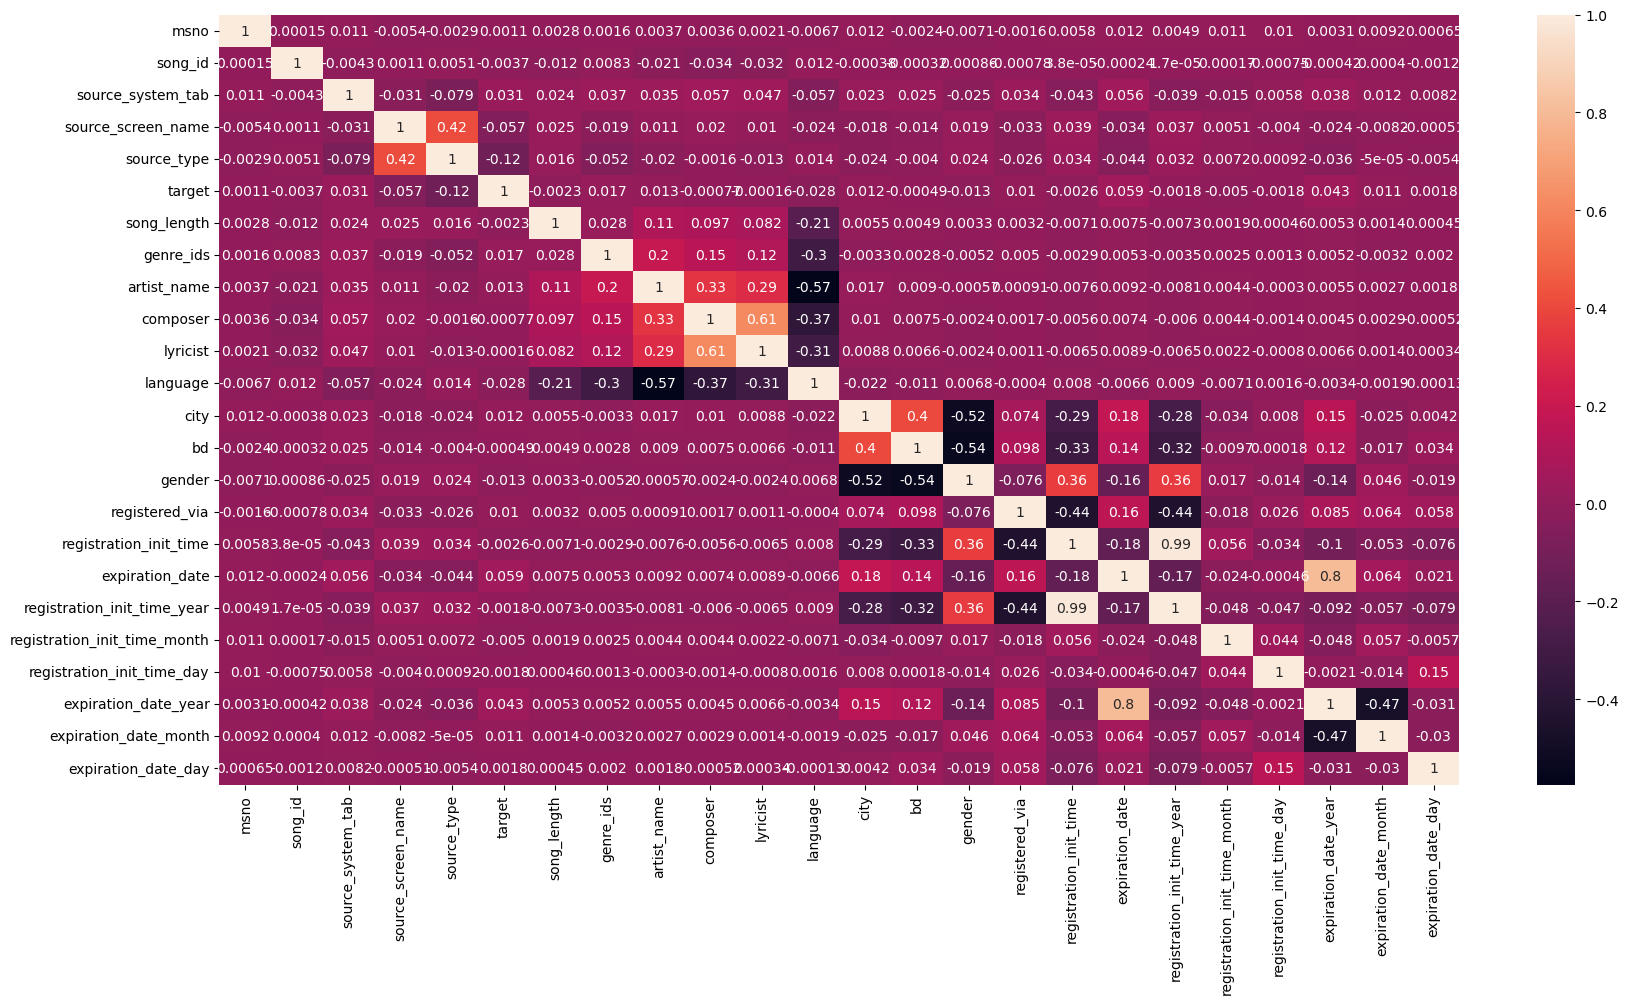

In [24]:
# Сorrelation matrix

plt.figure(figsize = [20,10])
sns.heatmap(train.corr(), annot = True)
plt.show()

### Train and Test split

In [25]:
target = train.pop('target')

train_x, test_x, train_y, test_y = train_test_split(train, target, test_size = 0.2)

In [26]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2950967, 23), (737742, 23), (2950967,), (737742,))

### Random Forest

In [ ]:
# Model with the best estimator

random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)

In [ ]:
random_forest_trainscore = random_forest.score(train_x, train_y)
random_forest_trainscore

In [ ]:
random_forest_testscore = random_forest.score(test_x, test_y)
random_forest_testscore

In [ ]:
y_pred_rf = random_forest.predict(test_y)

In [ ]:
#Confusion matrix

cm_rf = confusion_matrix(test_y, y_pred_rf)
sns.heatmap(cm_rf, annot = True, fmt = 'g')

In [ ]:
classification_report(test_y, y_pred_rf)

### Feature Selection

In [ ]:
train_plot = pd.DataFrame({'features': train.columns,
                        'importances': random_forest.feature_importances_})

train_plot = train_plot.sort_values('importances', ascending = False)

In [ ]:
plt.figure(figsize = [15,10])

sns.barplot(x = train_plot.importances, y = train_plot.features)

plt.title('Importances of Features')
plt.show()

In [ ]:
# Drop columns with importances < 0.04

train = train.drop(train_plot.features[train_plot.importances < 0.04].tolist(), 1)

In [ ]:
# Selected columns

train.columns

In [ ]:
# Сorrelation matrix

plt.figure(figsize = [20,10])

sns.heatmap(train.corr(), annot = True)
plt.show()

### XGBoosting

In [ ]:
# Create model
XGB = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 15, min_child_weight = 5)
XGB.fit(train_x, train_y)

In [ ]:
XGB_trainscore = XGB.score(train_x, train_y)
XGB_trainscore

In [ ]:
XGB_testscore = XGB.score(test_x, test_y)
XGB_testscore

In [ ]:
y_pred_xgb = XGB.predict(test_x)

In [ ]:
cm_xgb = confusion_matrix(test_y, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = 'g')

In [ ]:
classification_report(test_y, y_pred_xgb)

### Light LGBM

In [ ]:
lgbm_train = lgbm.Dataset(train_x, label = train_y)

In [ ]:
params = {
        'objective': 'binary',
        'boosting': 'dart',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric' : 'auc'
    }

In [ ]:
clf = lgbm.train(params, d_train, 100)

In [ ]:
y_pred_train_lgbm = clf.predict(train_data)

In [ ]:
y_pred_test_lgbm = clf.predict(test_data)

In [ ]:
# Making Prediction for training and test sets

for i in range(0, train_x.shape[0]):
    if y_pred_train_lgbm[i] >= .5: 
        y_pred_train_lgbm[i] = 1
    else:  
        y_pred_train_lgbm[i] = 0
        
for i in range(0, test_x.shape[0]):
    if y_pred_test_lgbm[i] >= .5: 
        y_pred_test_lgbm[i] = 1
    else:  
        y_pred_test_lgbm[i] = 0 

In [ ]:
lgbm_trainscore = accuracy_score(y_predtrain_lgbm,train_labels)
lgbm_trainscore

In [ ]:
lgbm_testsore = accuracy_score(y_predtest_lgbm,test_labels)
lgbm_testsore

In [ ]:
#Confusion matrix

cm_lgbm = confusion_matrix(test_y, y_pred_test_lgbm)
sns.heatmap(cm_lgbm, annot = True, fmt = 'g')

In [ ]:
classification_report(test_y, y_pred_test_lgbm)

### CatBoost Classifier

In [ ]:
CatBoost = CatBoostClassifier(learning_rate = 0.1, depth = 10, iterations = 300)
CatBoost.fit(train_x, train_y)

In [ ]:
CatBoost_trainscore = CatBoost.score(train_x, train_y)
CatBoost_trainscore

In [ ]:
CatBoost_testscore = CatBoost.score(train_x, train_y)
CatBoost_testscore

In [ ]:
# Predicting

y_pred_catboost = CatBoost.predict(test_x)

In [ ]:
cm_catboost = confusion_matrix(test_y, y_pred_catboost)
sns.heatmap(cm_catboost, annot = True, fmt = 'g')

In [ ]:
classification_report(test_y, y_pred_catboost)

### Comparing Boostings Results

In [ ]:
results = pd.DataFrame( [["Random Forest", random_forest_trainscore, random_forest_testscore ],
                       ["XGBoost", XGB_trainscore ,XGB_testscore ],
                        ["Light LGBM", lgbm_trainscore , lgbm_testscore ],
                        ["CatBoost", CatBoost_trainscore, CatBoost_testscore]],
                       columns = ["Model", "Training Accuracy %", "Test Evaluation %"]).sort_values(by="Test Evaluation %",
                                                                                                    ascending=False)
results.style.background_gradient(cmap = 'viridis')